This jupyter notebook is just to visualize the outputs and not to preprocess completely

If your python env is not recognized in ipynb then

-> Activate the environment

->  Register your environment as a Jupyter kernel

python -m ipykernel install --user --name=project_env --display-name "Python (project_env)"

--user: register the kernel for your user only (no admin needed).

--name=project_env: internal name used by Jupyter.

--display-name="Python (project_env)": name you'll see in the Jupyter interface.

In [1]:
import os # helps with interacting with file paths and the operating system
import sys # gives access to variables and functions that interact with the Python runtime
# used here to control how modules are imported

In [5]:
sys.path.append(os.path.abspath("../src"))
# This adds the ../src folder to Python's import path — so Python knows where to look when you use import statements
# ../src means: “go up one folder from the current working directory, then into the src folder”

# Adds the absolute path of src to sys.path
# sys.path is a list of directories Python checks when you do an import

In [7]:
from preprocessing import min_max_normalize,resize_slice

In [32]:
import nibabel as nib
import numpy as np
import  matplotlib.pyplot as plt

In [35]:
# Visualisation for 1 data example
def visualisation(file_path,scan_type):
    img=nib.load(file_path) # nib.load(file_path) loads a NIfTI file (like ct.nii.gz or mri.nii.gz) from the path into memory , it returns a Nifti1Image object
    data=img.get_fdata() # These are returned as a NumPy 3D array
    data=min_max_normalize(data)

    x=data.shape[0]//2
    y=data.shape[1]//2
    z=data.shape[2]//2

    axial=resize_slice(np.rot90(data[:,:,z]))
    coronal=resize_slice(np.rot90(data[:,y,:]))
    saggital=resize_slice(np.rot90(data[x,:,:]))

    # fig is the overall figure container. axes is a list (or array) of the individual subplot 
    fig,axes=plt.subplots(1,3,figsize=(15,5))
    axes[0].imshow(axial,cmap="gray")
    axes[0].set_title(f"Axial {scan_type}")

    axes[1].imshow(coronal,cmap="gray")
    axes[1].set_title(f"Coronal {scan_type}")

    axes[2].imshow(saggital,cmap="gray")
    axes[2].set_title(f"Saggital {scan_type}")

    plt.tight_layout()
    plt.show()


In [36]:
from pathlib import Path
folder_path=Path(r"C:\Users\joshi\OneDrive\Desktop\Medical\MLHealthcare\data\raw\1BC090")

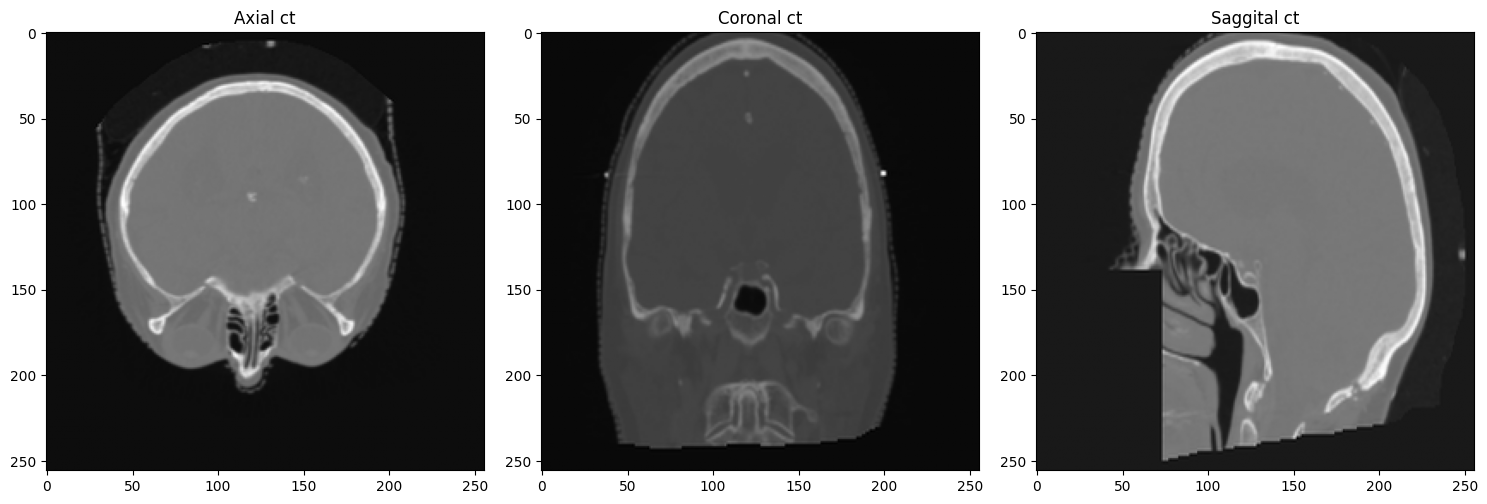

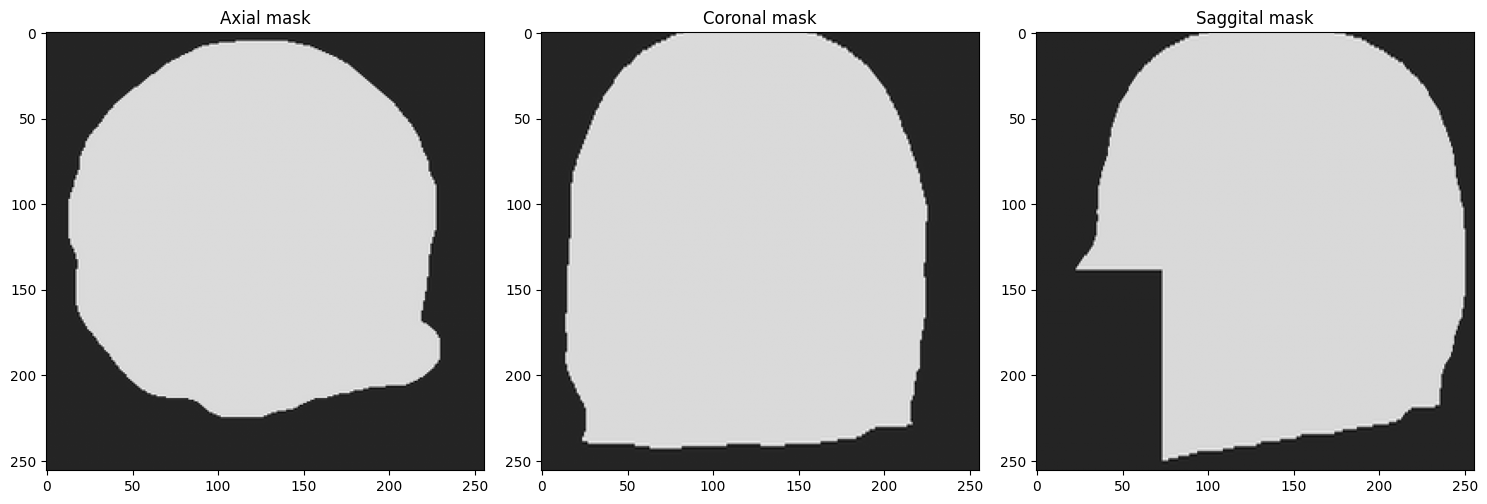

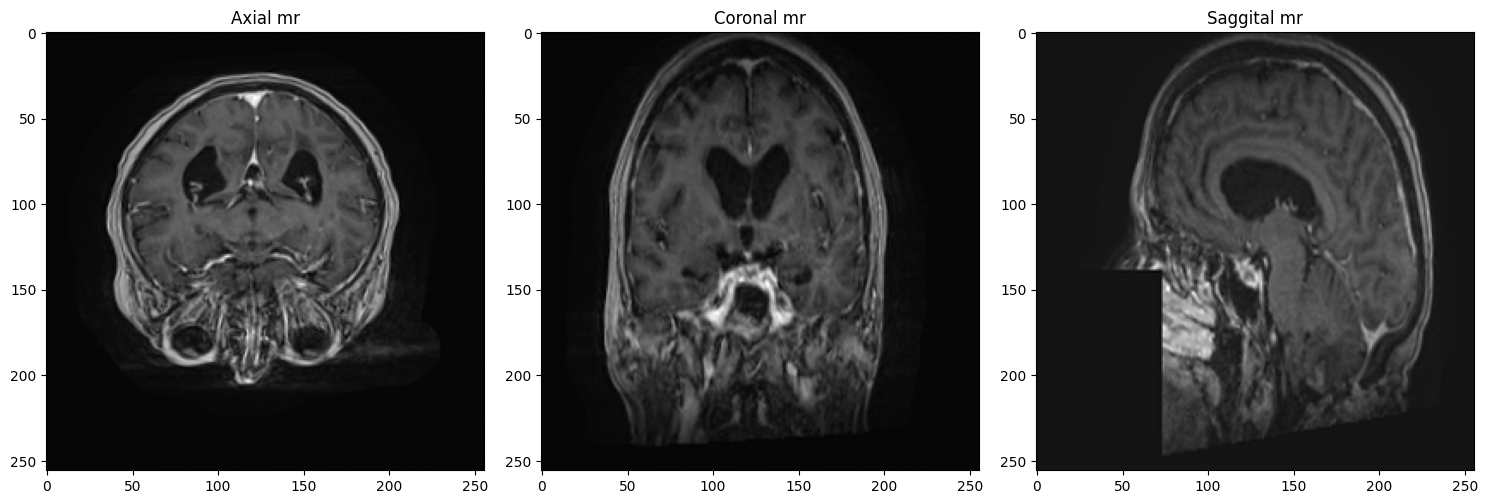

In [40]:
for file in os.listdir(folder_path):
    if(file.endswith(".nii") or file.endswith("nii.gz")):
        file_path=os.path.join(folder_path,file)
        # scan_type=Path(file).stem # stem is an attribute of path object but stems only last thing e.g 1.nii.gz it gives 1.nii
        scan_type=file.split(".")[0]
        visualisation(file_path,scan_type)